In [1]:
import glob
import pandas as pd


In [3]:
#Mac
#path ='/Users/cseveriano/spatio-temporal-forecasting/data/raw/SINGA-Nobre/716'

#Windows
path ='C:\\Users\\cseve\\Google Drive\\Doutorado\\Codes\\spatio-temporal-forecasting\\data\\raw\\SINGA-Nobre\\716'

allFiles = glob.iglob(path + "/**/*.txt", recursive=True)

frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    print("Reading: ",file_)
    df = pd.read_csv(file_,index_col="Tm",parse_dates=['Tm'], header=0, sep="\t")
    if frame.columns is None :
        frame.columns = df.columns
    list_.append(df)
frame = pd.concat(list_)

Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-01.txt
Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-02.txt
Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-03.txt
Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-04.txt
Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-05.txt
Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-06.txt
Reading:  C:\Users\cseve\Google Drive\Doutorado\Codes\spatio-temporal-forecasting\data\raw\SINGA-Nobre\716\716 2017-11\[716] 2017-11-07.txt
Reading:  C:\Users\c

In [29]:
def load_data(path, resampling=None):
    ## some resampling options: 'H' - hourly, '15min' - 15 minutes, 'M' - montlhy
    ## more options at:
    ## http://benalexkeen.com/resampling-time-series-data-with-pandas/
    allFiles = glob.iglob(path + "/**/*.txt", recursive=True)
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        #print("Reading: ",file_)
        df = pd.read_csv(file_,index_col="Tm",parse_dates=['Tm'], header=0, sep="\t")
        if frame.columns is None :
            frame.columns = df.columns
        list_.append(df)
    frame = pd.concat(list_)
    if resampling is not None:
        frame = frame.resample(resampling).mean()
    return frame

In [30]:
nov_716 = load_data('/Users/cseveriano/spatio-temporal-forecasting/data/raw/SINGA-Nobre/716 2017-11', '15min')



In [37]:
type(nov_716.AvgGsi00)

pandas.core.series.Series

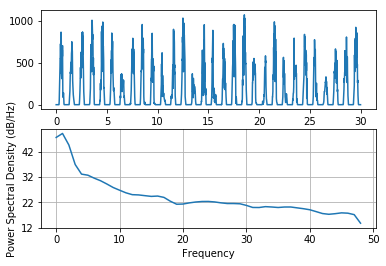

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

Fs = 96;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,30,Ts) # time vector
y = nov_716.AvgGsi00

plt.subplot(211)
plt.plot(t, y)
plt.subplot(212)
plt.psd(y, 96, Fs)

plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1438 entries, 2017-11-01 00:00:00 to 2017-11-01 23:59:00
Columns: 146 entries, Rec_ID to THD_V-CA_C
dtypes: float64(145), int64(1)
memory usage: 1.6 MB


array([[  9.77200000e+03,  -1.23000000e-01,   2.72380000e+01, ...,
          1.59000000e+00,   1.88100000e+00,   1.75500000e+00],
       [  9.77300000e+03,   1.45000000e-01,   2.72530000e+01, ...,
          1.56700000e+00,   1.79700000e+00,   1.74200000e+00],
       [  9.77400000e+03,  -2.82000000e-01,   2.72770000e+01, ...,
          1.58400000e+00,   1.84000000e+00,   1.77200000e+00],
       ..., 
       [  1.13400000e+03,  -1.51000000e-01,   2.69840000e+01, ...,
          1.66500000e+00,   1.99100000e+00,   1.85900000e+00],
       [  1.13500000e+03,  -9.80000000e-02,   2.70230000e+01, ...,
          1.66500000e+00,   1.99100000e+00,   1.85900000e+00],
       [  1.13600000e+03,   5.80000000e-02,   2.70400000e+01, ...,
          1.66500000e+00,   1.99100000e+00,   1.85900000e+00]])